In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

AllData = pd.read_csv('kc_house_data.xls')
Train = (AllData[0: int(.60*(len(AllData)))])
Test = (AllData[int(.60*(len(AllData))): ])

In [2]:
TrainPrice = (np.array(Train.price))/max(Train.price)
sqft_living15 = (np.array(Train.sqft_living15))/ max(Train.sqft_living15)
Trainsqft_living15 = (np.array([(sqft_living15**3), (sqft_living15**2), sqft_living15, (np.array([1]*12967))])).T

In [3]:
alpha = .1
ThetasOld = (np.random.rand(4)).T

for i in range(60000):
#     Intermediateresult = (np.dot(Trainsqft_living15, ThetasOld))
#     Intermediateresult = Intermediateresult - TrainPrice
#     Intermediateresult = (np.dot(Intermediateresult , Trainsqft_living15))*2
    Intermediateresult = ((np.dot((np.dot(Trainsqft_living15, ThetasOld) - TrainPrice), Trainsqft_living15))*2)/len(Train)
    ThetasOld = ThetasOld - np.dot(Intermediateresult,alpha) 
    

In [4]:
reg_line = np.array([(( ThetasOld[0]*(X**3)) + (ThetasOld[1]*(X**2))+ (ThetasOld[2]*X) + ThetasOld[3]) for X in sqft_living15])

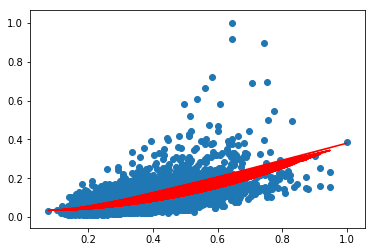

In [5]:
plt.scatter(sqft_living15, TrainPrice)
plt.plot(sqft_living15, reg_line, color="red")
plt.show()

In [6]:
Testsqft_living15 = np.array(Test.sqft_living15)/ max(Test.sqft_living15)
TestPrice = np.array(Test.price)/ max(Test.price)

In [7]:
reg_line = np.array([(( ThetasOld[0]*(X**3)) + (ThetasOld[1]*(X**2))+ (ThetasOld[2]*X) + ThetasOld[3]) for X in Testsqft_living15])

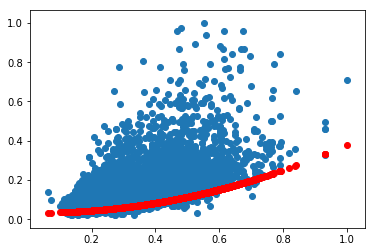

In [8]:
plt.scatter(Testsqft_living15, TestPrice)
plt.scatter(Testsqft_living15, reg_line, color="red")
plt.show()

In [9]:
error = sum((Testsqft_living15 - reg_line)**2)/len(Test)

In [10]:
error

0.07140462967701669